# Education EDA
This notebook explores educational assessment data provided from NCES. The original datasets were achievement broken down by subject, Local Educational Agency (LEA), and school year. For now, we'll focus on 2017-18.

1. [Import Data](#Import-Data)

2. [Preview Data and Structure](#Preview-Data)

3.  [MATH ASSESSMENT](#Math-Assessment-Data)

4. [Reading & Language Arts (RLA) Assessment](#Reading-and-Language-Arts-Assessment)




# Import Data

In [7]:
## Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
## Import 2018 LEA  math data to start
math_2018 = pd.read_csv('data/education/math-achievement-lea-sy2017-18.csv', low_memory=False)

In [11]:
## Preview dataset first 5
math_2018.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,27MAR19,2892,45,5,PS,...,14,LT50,5,PS,11,GE50,14,GE50,10,GE50
1,ALABAMA,1,100006,AL-048,Marshall County,27MAR19,2987,43,12,GE50,...,1,PS,NaN,NaN,3,PS,2,PS,3,PS
2,ALABAMA,1,100007,AL-158,Hoover City,27MAR19,7551,70,5,PS,...,12,GE50,8,GE50,6,GE50,12,GE50,20,40-59
3,ALABAMA,1,100008,AL-169,Madison City,27MAR19,5668,76,47,60-69,...,34,60-69,38,70-79,42,60-69,51,70-79,44,70-79
4,ALABAMA,1,100011,AL-167,Leeds City,27MAR19,1017,40,2,PS,...,6,LT50,NaN,NaN,2,PS,4,PS,3,PS


In [28]:
math_2018.shape

(15984, 262)

#### Rows
There are almost 16,000 rows here. They appear to be unique observations for each Local Education Agency (LEA), but let's confirm:

In [239]:
## Ensure that LEAID is a unique value for each observation
math_2018['LEAID'].nunique() == math_2018.shape[0]
## Returns True if all values are unique

True

Great. Since the unique number of LEAIDs (15984) matches the total number of observations for the dataset, we know that it is a unique value. We can use this value as our index later.

#### Columns
To preview what's in them better, we'll look at just the columns to see if we can eliminate redundancies/noise.

The first set of columns contains identifying data:
- STNAME - State Name
- FIPST - ANSI 2-digit code for state
- LEAID - NCES-assigned District ID
- ST_LEAID - State-assigned District ID
- LEANM - District Name
- DATE_CUR - Date of data snapshot

And the rest contain various groupings of the data for each observation (LEA) in the following format:
- \[SUBGROUP\]_\[SUBJECT\]\[GRADE\]\[METRIC\]_\[SCHOOLYEAR\]

Reading the [documentation]('..\data\education\education_documentation_2018.docx) provides an overview of those columns, along with their corresponding meanings:

- **Subgroups** - Major Racial and Ethnic Groups / Special Populations
    - ALL - All Students in the school
    - Racial Subgroups (begin with M):
        - MAM American Indian/Alaska Native
        - MAS Asian/Pacific Islander
        - MHI Hispanic
        - MBL Black
        - MWH White
        - MTR Two or More Races
    - Special Population Subgroups:
        - CWD Children with disabilities
        - ECD Economically disadvantaged
        - LEP Limited English proficiency
        - HOM Homeless
        - MIG Migrant
        - FCS Foster Care Status
        - MIL Military Connected (new for '17-'18)
        
- **Subject** - Specific to each file.
    - Math (MTH) or Reading/Language Arts (RLA)
    
- **Grade** 
    - 00 - aggregated across all grades
    - 03-08 - Grades 3-8
    - HS - High School
    
- **Metric**
    - numvalid - # of students who completed assessment proficient
    - pctprof - % of students proficient or higher
    
- **School Year**
    - Limited to 2017-18 in this case
    - May be able to add additional years later for better understanding
    
So, for example, the column labeled "**MBL_MTH08PCTPROF_1718**" describes: 
- in 2017-18 **\[1718\]**,
- for Black students **\[MBL\]** 
- studying Math **\[MTH\]**
- in the Eighth grade **\[08\]**, 
- what Percentage were deemed Proficient **\[PCTPROF\]**



Knowing and observing this breakdown might prove helpful in improving the model later. For now, however, we'll keep only the following columns:
- LEAID - as our unique identifier / index
- ALL_MTHHSPCTPROF_1718 - as our prediction column.

Given the business understanding and limitation to HS students, this makes sense. Since we don't have a total number of students who took the exam, percentage proficient will standardize the number proficient across districts.

## Math Assessment Data

In [117]:
## Create new dataframe with just the two desired columns
all_math_2018 = math_2018[['LEAID','ALL_MTHHSPCTPROF_1718']]
all_math_2018.columns = all_math_2018.columns.str.lower()

In [118]:
## Rename math score column for readability
## Keep LEAID for later merging with other datasets
all_math_2018.rename(columns={'all_mthhspctprof_1718': 'math_score'}, inplace=True)

## Preview new dataset head
all_math_2018.head()

,leaid,math_score
0,100005,37
1,100006,43
2,100007,70
3,100008,75
4,100011,50-54


In [141]:
test_10 = all_math_2018[:10]

In [119]:
## Get information about new dataset
all_math_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   leaid       15984 non-null  int64 
 1   math_score  12358 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.9+ KB


This dataset is much cleaner. 

However, looking closer at the target variable column we have two issues in the target variable column:
1. Null values - around 3600
2. Datatype - is classified as object

Not only is the target variable classified as an object, but looking at the 5th observation, the objects do not appear to be readily convertible to integers, since some of them appear to be ranges. Taking a further look:

In [126]:
all_math_2018['math_score'].unique()

array(['37', '43', '70', '75', '50-54', '40-44', '73', '45-49', '25-29',
       '70-74', '30-34', '55-59', '20-29', '60-64', '58', 'PS', '72',
       '53', '10-14', '18', '46', 'LE5', '40', '38', '15-19', '75-79',
       '47', '20-24', '35', '39', '30-39', '35-39', '44', '6-9', '80-84',
       '42', '31', '50', '41', '55', '27', '45', '91', '61', '52', '34',
       '82', '33', '5', 'LE20', 'LT50', '21-39', '11-19', '25', '32',
       '60-79', '24', 'GE50', '23', nan, 'LE10', '40-59', '69', '60-69',
       '50-59', '80-89', '40-49', '12', '51', '70-79', '65-69', '16',
       '28', '90-94', '57', '22', 'GE95', 'GE80', '21', '.', '36', '65',
       '30', '66', '56', '64', '48', '49', '60', '62', '59', '20', '6',
       '85-89', '15', '8', '29', '10', '26', '63', '68', '71', '19', '54',
       '17', '13', '14', '9', '67', '74', '86', '4', 'LE1', '11', '81',
       '78', '77', '79', 'GE90', '83', '2', '76', '80', '7', '92', '87',
       '90', '84', '95', '88', '85', '96', '89', '93', '97', 

Further inspection reveals that "nan" values, "." values (also described as blank in documentation),  ranges, and strings are complicating the numerical analysis. Referring again to the documentation, these variations were intentionally introduced for student privacy concerns, with the following codes:

- GE - Greater than or equal to
- LE - Less than or equal to
- GT Greater than
- LT - Less than
- PS - Privacy Suppressed (<5 students)

Specifically, as specified in Part 1.5 and Table 2 of the documentation for 2017-18, for schools with less than 300 students, "As the number of students reported increases, the magnitude of the range decreases". 

Given these ranges, we can make a few choices:

1. Limit the study to large high schools (300+). 
    - Benefit: Leaves only whole numbers, enabling integer conversion. 
    - Benefit: Allows for the possible usage of linear regression since it would be a continuous variable
    - Cost: Eliminates the potential for analyzing size as a factor; Unnecessarily eliminates data
    

2. Bin the score ranges...more options here: 
    - Smaller scale (e.g., 25-29)
    - Medium-scale (e.g., Very High proficiency (>80%), high proficiency (60-80), proficient (40-60), low proficiency (20-40), very low proficiency (0-20)
    - Large scale (e.g., >= 50% as proficient)
    

For now, let's focus on large high schools. In this dataset, this means limiting the observations selected to those with 1 or 2 characters that are not "PS":

In [193]:
all_math_2018['math_score'] = pd.to_numeric(all_math_2018['math_score'], errors='coerce')
all_math_2018.columns = all_math_2018.columns.str.lower()
all_math_2018.head()

<ipython-input-193-8b350bc8ae19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_math_2018['math_score'] = pd.to_numeric(all_math_2018['math_score'], errors='coerce')


,leaid,math_score
0,100005,37.0
1,100006,43.0
2,100007,70.0
3,100008,75.0
4,100011,NaN


In [194]:
all_math_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   leaid       15984 non-null  int64  
 1   math_score  2366 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 249.9 KB


In [195]:
math_300 = all_math_2018.dropna()

In [196]:
math_300.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 0 to 15981
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   leaid       2366 non-null   int64  
 1   math_score  2366 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 55.5 KB


Unfortunately, using only the schools that hadn't been "blurred" will result in too few datapoints. For now, though, let's continue by repeating this procedure for Reading and Language Arts data (RLA).

<AxesSubplot:>

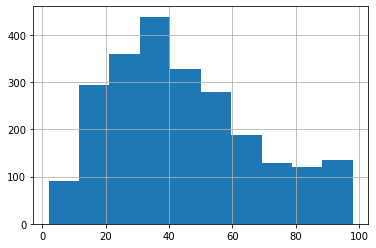

In [197]:
math_300['math_score'].hist()

In [244]:
math_300.to_csv('data/education/math_300_2018.csv')

## Reading and Language Arts Assessment

In [199]:
rla_2018 = pd.read_csv('data/education/rla-achievement-lea-sy2017-18.csv', low_memory=False)

In [200]:
rla_2018.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718,MAM_RLA00NUMVALID_1718,MAM_RLA00PCTPROF_1718,MAS_RLA00NUMVALID_1718,MAS_RLA00PCTPROF_1718,MBL_RLA00NUMVALID_1718,MBL_RLA00PCTPROF_1718,MHI_RLA00NUMVALID_1718,MHI_RLA00PCTPROF_1718,MTR_RLA00NUMVALID_1718,MTR_RLA00PCTPROF_1718,MWH_RLA00NUMVALID_1718,MWH_RLA00PCTPROF_1718,F_RLA00NUMVALID_1718,F_RLA00PCTPROF_1718,M_RLA00NUMVALID_1718,M_RLA00PCTPROF_1718,CWD_RLA00NUMVALID_1718,CWD_RLA00PCTPROF_1718,ECD_RLA00NUMVALID_1718,ECD_RLA00PCTPROF_1718,FCS_RLA00NUMVALID_1718,FCS_RLA00PCTPROF_1718,LEP_RLA00NUMVALID_1718,LEP_RLA00PCTPROF_1718,HOM_RLA00NUMVALID_1718,HOM_RLA00PCTPROF_1718,MIG_RLA00NUMVALID_1718,MIG_RLA00PCTPROF_1718,MIL_RLA00NUMVALID_1718,MIL_RLA00PCTPROF_1718,ALL_RLA03NUMVALID_1718,ALL_RLA03PCTPROF_1718,ALL_RLA04NUMVALID_1718,ALL_RLA04PCTPROF_1718,ALL_RLA05NUMVALID_1718,ALL_RLA05PCTPROF_1718,ALL_RLA06NUMVALID_1718,ALL_RLA06PCTPROF_1718,ALL_RLA07NUMVALID_1718,ALL_RLA07PCTPROF_1718,ALL_RLA08NUMVALID_1718,ALL_RLA08PCTPROF_1718,ALL_RLAHSNUMVALID_1718,ALL_RLAHSPCTPROF_1718,MAM_RLA03NUMVALID_1718,MAM_RLA03PCTPROF_1718,MAM_RLA04NUMVALID_1718,MAM_RLA04PCTPROF_1718,MAM_RLA05NUMVALID_1718,MAM_RLA05PCTPROF_1718,MAM_RLA06NUMVALID_1718,MAM_RLA06PCTPROF_1718,MAM_RLA07NUMVALID_1718,MAM_RLA07PCTPROF_1718,MAM_RLA08NUMVALID_1718,MAM_RLA08PCTPROF_1718,MAM_RLAHSNUMVALID_1718,MAM_RLAHSPCTPROF_1718,MAS_RLA03NUMVALID_1718,MAS_RLA03PCTPROF_1718,MAS_RLA04NUMVALID_1718,MAS_RLA04PCTPROF_1718,MAS_RLA05NUMVALID_1718,MAS_RLA05PCTPROF_1718,MAS_RLA06NUMVALID_1718,MAS_RLA06PCTPROF_1718,MAS_RLA07NUMVALID_1718,MAS_RLA07PCTPROF_1718,MAS_RLA08NUMVALID_1718,MAS_RLA08PCTPROF_1718,MAS_RLAHSNUMVALID_1718,MAS_RLAHSPCTPROF_1718,MBL_RLA03NUMVALID_1718,MBL_RLA03PCTPROF_1718,MBL_RLA04NUMVALID_1718,MBL_RLA04PCTPROF_1718,MBL_RLA05NUMVALID_1718,MBL_RLA05PCTPROF_1718,MBL_RLA06NUMVALID_1718,MBL_RLA06PCTPROF_1718,MBL_RLA07NUMVALID_1718,MBL_RLA07PCTPROF_1718,MBL_RLA08NUMVALID_1718,MBL_RLA08PCTPROF_1718,MBL_RLAHSNUMVALID_1718,MBL_RLAHSPCTPROF_1718,MHI_RLA03NUMVALID_1718,MHI_RLA03PCTPROF_1718,MHI_RLA04NUMVALID_1718,MHI_RLA04PCTPROF_1718,MHI_RLA05NUMVALID_1718,MHI_RLA05PCTPROF_1718,MHI_RLA06NUMVALID_1718,MHI_RLA06PCTPROF_1718,MHI_RLA07NUMVALID_1718,MHI_RLA07PCTPROF_1718,MHI_RLA08NUMVALID_1718,MHI_RLA08PCTPROF_1718,MHI_RLAHSNUMVALID_1718,MHI_RLAHSPCTPROF_1718,MTR_RLA03NUMVALID_1718,MTR_RLA03PCTPROF_1718,MTR_RLA04NUMVALID_1718,MTR_RLA04PCTPROF_1718,MTR_RLA05NUMVALID_1718,MTR_RLA05PCTPROF_1718,MTR_RLA06NUMVALID_1718,MTR_RLA06PCTPROF_1718,MTR_RLA07NUMVALID_1718,MTR_RLA07PCTPROF_1718,MTR_RLA08NUMVALID_1718,MTR_RLA08PCTPROF_1718,MTR_RLAHSNUMVALID_1718,MTR_RLAHSPCTPROF_1718,MWH_RLA03NUMVALID_1718,MWH_RLA03PCTPROF_1718,MWH_RLA04NUMVALID_1718,MWH_RLA04PCTPROF_1718,MWH_RLA05NUMVALID_1718,MWH_RLA05PCTPROF_1718,MWH_RLA06NUMVALID_1718,MWH_RLA06PCTPROF_1718,MWH_RLA07NUMVALID_1718,MWH_RLA07PCTPROF_1718,MWH_RLA08NUMVALID_1718,MWH_RLA08PCTPROF_1718,MWH_RLAHSNUMVALID_1718,MWH_RLAHSPCTPROF_1718,F_RLA03NUMVALID_1718,F_RLA03PCTPROF_1718,F_RLA04NUMVALID_1718,F_RLA04PCTPROF_1718,F_RLA05NUMVALID_1718,F_RLA05PCTPROF_1718,F_RLA06NUMVALID_1718,F_RLA06PCTPROF_1718,F_RLA07NUMVALID_1718,F_RLA07PCTPROF_1718,F_RLA08NUMVALID_1718,F_RLA08PCTPROF_1718,F_RLAHSNUMVALID_1718,F_RLAHSPCTPROF_1718,M_RLA03NUMVALID_1718,M_RLA03PCTPROF_1718,M_RLA04NUMVALID_1718,M_RLA04PCTPROF_1718,M_RLA05NUMVALID_1718,M_RLA05PCTPROF_1718,M_RLA06NUMVALID_1718,M_RLA06PCTPROF_1718,M_RLA07NUMVALID_1718,M_RLA07PCTPROF_1718,M_RLA08NUMVALID_1718,M_RLA08PCTPROF_1718,M_RLAHSNUMVALID_1718,M_RLAHSPCTPROF_1718,CWD_RLA03NUMVALID_1718,CWD_RLA03PCTPROF_1718,CWD_RLA04NUMVALID_1718,CWD_RLA04PCTPROF_1718,CWD_RLA05NUMVALID_1718,CWD_RLA05PCTPROF_1718,CWD_RLA06NUMVALID_1718,CWD_RLA06PCTPROF_1718,CWD_RLA07NUMVALID_1718,CWD_RLA07PCTPROF_1718,CWD_RLA08NUMVALID_1718,CWD_RLA08PCTPROF_1718,CWD_RLAHSNUMVALID_1718,CWD_RLAHSPCTPROF_1718,ECD_RLA03NUMVALID_1718,ECD_RLA03PCTPROF_1718,ECD_RLA04NUMVALID_1718,ECD_RLA04PCTPROF_1718,ECD_RLA05NUMVALID_1718,ECD_RLA05PCTPROF_1718,ECD_RLA06NUMVALI

In [201]:
rla_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16110 entries, 0 to 16109
Columns: 262 entries, STNAM to MIL_RLAHSPCTPROF_1718
dtypes: int64(3), object(259)
memory usage: 32.2+ MB


In [202]:
rla_2018.shape

(16110, 262)

In [203]:
rla_2018.LEAID.nunique()

16110

Off the bat, we notice that the number of unique LEAID values in the RLA dataset is HIGHER than in the Math dataset. This means there were several districts left out of the math dataset. We'll consolidate them in just a minute. Fortunately, however, the number of columns is consistent across datasets at 262

In [204]:
all_rla_2018 = rla_2018[['LEAID','ALL_RLAHSPCTPROF_1718']]
all_rla_2018.columns = all_rla_2018.columns.str.lower()
all_rla_2018.rename(columns={'all_rlahspctprof_1718': 'rla_score'}, inplace=True)


C:\Anaconda3\envs\capstone\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [205]:
all_rla_2018.head()

,leaid,rla_score
0,100005,32
1,100006,40
2,100007,69
3,100008,71
4,100011,45-49


In [206]:
assessments_2018 = pd.merge(all_rla_2018, all_math_2018, how='inner', on='leaid').dropna()

In [207]:
assessments_2018.head()

,leaid,rla_score,math_score
0,100005,32,37.0
1,100006,40,43.0
2,100007,69,70.0
3,100008,71,75.0
6,100013,70,73.0


In [208]:
assessments_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 0 to 15967
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   leaid       2366 non-null   int64  
 1   rla_score   2366 non-null   object 
 2   math_score  2366 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 73.9+ KB


In [243]:
assessments_2018.to_csv('data/education/assessments_2018.csv')

In [210]:
all_rla_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16110 entries, 0 to 16109
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   leaid      16110 non-null  int64 
 1   rla_score  12487 non-null  object
dtypes: int64(1), object(1)
memory usage: 251.8+ KB


In [211]:
all_rla_2018.dropna(inplace=True)

<ipython-input-211-e407d23a776f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rla_2018.dropna(inplace=True)


In [212]:
all_rla_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 16109
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   leaid      12487 non-null  int64 
 1   rla_score  12487 non-null  object
dtypes: int64(1), object(1)
memory usage: 292.7+ KB


In [213]:
all_rla_2018['rla_score'] = pd.to_numeric(all_rla_2018['rla_score'], errors='coerce')

<ipython-input-213-cd6227fd0a3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rla_2018['rla_score'] = pd.to_numeric(all_rla_2018['rla_score'], errors='coerce')


In [214]:
rla_300 = all_rla_2018.dropna()
rla_300.head()

,leaid,rla_score
0,100005,32.0
1,100006,40.0
2,100007,69.0
3,100008,71.0
6,100013,70.0


<AxesSubplot:>

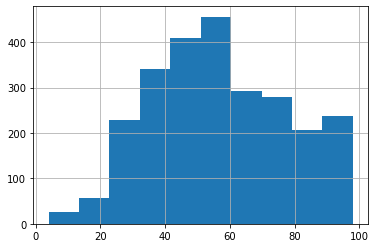

In [215]:
rla_300['rla_score'].hist()

In [242]:
rla_300.to_csv('data/education/rla_300_2018.csv')

In [217]:
assessments_300_2018 = pd.merge(math_300, rla_300, how='inner', on='leaid').dropna()

In [219]:
assessments_300_2018.head()

,leaid,math_score,rla_score
0,100005,37.0,32.0
1,100006,43.0,40.0
2,100007,70.0,69.0
3,100008,75.0,71.0
4,100013,73.0,70.0


In [224]:
assessments_300_2018.describe()

,leaid,math_score,rla_score
count,2.273000e+03,2273.000000,2273.000000
mean,2.847753e+06,44.372195,56.782666
std,1.606149e+06,22.732244,20.455128
min,1.000050e+05,2.000000,4.000000
25%,1.302580e+06,27.000000,41.000000
50%,3.305940e+06,41.000000,55.000000
75%,4.204890e+06,59.000000,72.000000
max,7.200030e+06,98.000000,98.000000


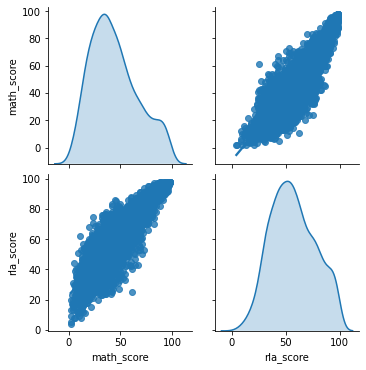

In [238]:
sns.pairplot(assessments_300_2018, vars=['math_score', 'rla_score'], kind='reg', diag_kind='kde');

As is probably expected, there is a definite correlation between Reading/Language Arts Scores and Math Scores for the limited dataset we're observing. It should be noted that the math score distribution skews slightly to the left. The RLA score skews to the right. This phenomenon is confirmed in the statistical summary which shows us that the mean math score is 45% and the mean reading/language arts score is 55%.

In [241]:
assessments_300_2018.to_csv('data/education/assessments_300_2018.csv')

## Census Broadband Data

## Census Device Data

## Geographical Data